In [71]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [60]:
linspace = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(linspace, linspace)

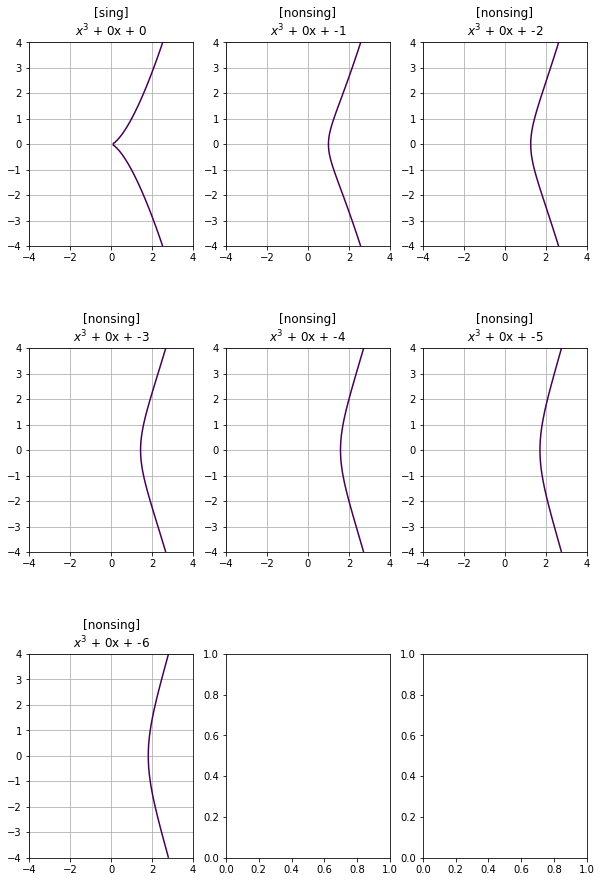

In [92]:
r,c = 3, 3
fig, ax = plt.subplots(r, c, figsize=(10, 15))
plt.subplots_adjust(hspace = 0.5)

a = 0
# b = 0, -1, -2, -3, ..., -6
for b in range(0, -7, -1):
    curr = ax[-b//c, -b%c]
    sing = "sing" if (4*a**3 + 27*b**2 == 0) else "nonsing"

    curr.contour(X, Y, Y**2 - (X**3 + a*X + b), [0])
    curr.title.set_text(f"[{sing}]\n$x^3$ + {a}x + {b}")
    curr.grid()


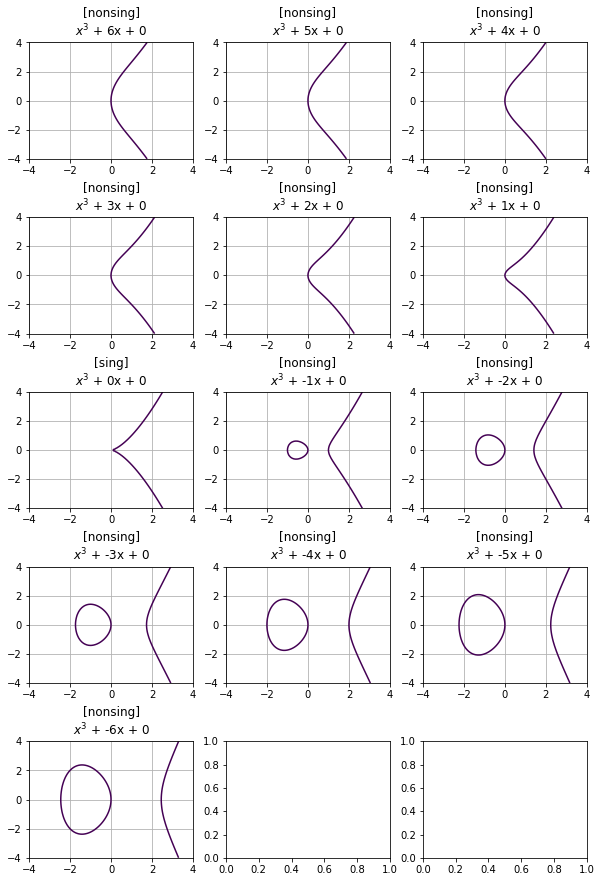

In [100]:
r,c = 5, 3
fig, ax = plt.subplots(r, c, figsize=(10, 15))
plt.subplots_adjust(hspace = 0.5)

b=0
# a = -6, -5, ..., 0, 1, ..., 6
for a in range(-6, 7):
    ind = 6 - a
    curr = ax[ind//c, ind % c]
    sing = "sing" if (4*a**3 + 27*b**2 == 0) else "nonsing"

    curr.contour(X, Y, Y**2 - (X**3 + a*X + b), [0])
    curr.title.set_text(f"[{sing}]\n$x^3$ + {a}x + {b}")
    curr.grid()


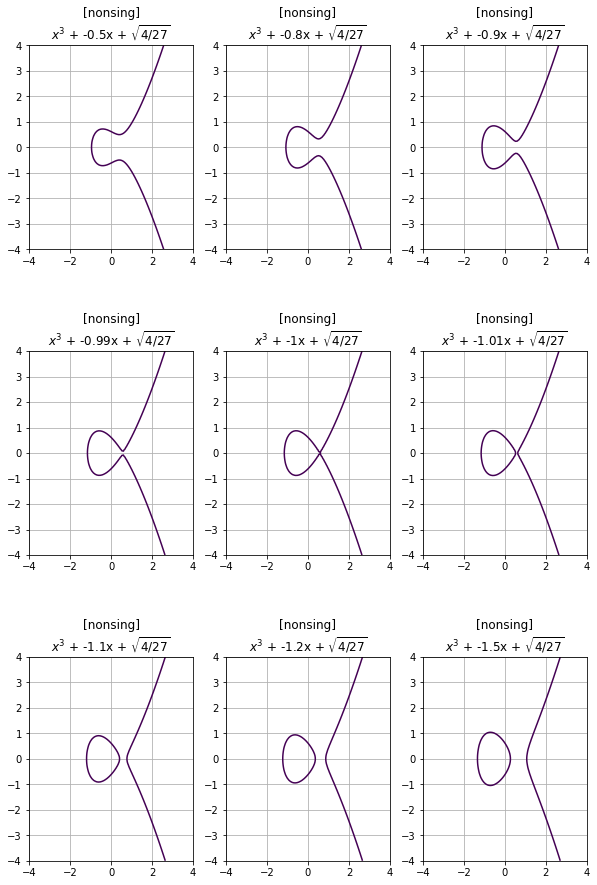

In [99]:
r,c = 3, 3
fig, ax = plt.subplots(r, c, figsize=(10, 15))
plt.subplots_adjust(hspace = 0.5)

b = sqrt(4/27)
# a = -0.5, -0.8, -0.9, -0.99, -1, -1.01, -1.1, -1.2, -1.5
vals = [-0.5, -0.8, -0.9, -0.99, -1, -1.01, -1.1, -1.2, -1.5]
for i in range(len(vals)):
    ind = i
    a = vals[ind]
    curr = ax[ind//c, ind % c]
    sing = "sing" if (4*a**3 + 27*b**2 == 0) else "nonsing"

    curr.contour(X, Y, Y**2 - (X**3 + a*X + b), [0])
    curr.title.set_text(f"[{sing}]\n$x^3$ + {a}x + $\sqrt{'{4/27}'}$")
    curr.grid()


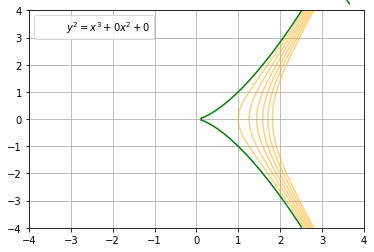

In [150]:
a = 0

# b = 0, -1, -2, -3, ..., -6
for b in range(-6, 1):
    sing = (4*a**3 + 27*b**2 == 0)
    color = "green" if (sing) else "orange"
    alpha = 1 if sing else .5

    CS = plt.contour(X, Y, Y**2 - (X**3 + a*X + b), [0], colors=color, alpha=alpha) #, label='$y^2 = x^3 + {a}x^2 + {b}$')
    if (sing):
        CS.collections[0].set_label(f"$y^2 = x^3 + {a}x^2 + {b}$")

# plt.legend(["green", "orange"], loc="lower right")
plt.legend(loc="upper left")
plt.grid()

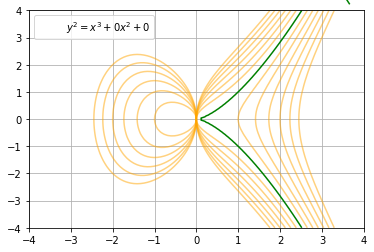

In [151]:
b = 0

# b = 0, -1, -2, -3, ..., -6
for a in range(-6, 7):
    sing = (4*a**3 + 27*b**2 == 0)
    color = "green" if (sing) else "orange"
    alpha = 1 if sing else .5

    CS = plt.contour(X, Y, Y**2 - (X**3 + a*X + b), [0], colors=color, alpha=alpha) #, label='$y^2 = x^3 + {a}x^2 + {b}$')
    if (sing):
        CS.collections[0].set_label(f"$y^2 = x^3 + {a}x^2 + {b}$")

plt.legend(loc="upper left")
plt.grid()

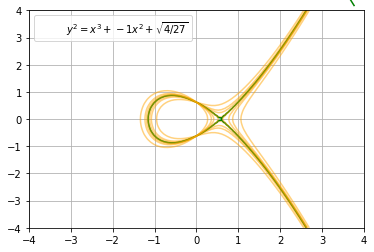

In [153]:
b = sqrt(4/27)

# b = 0, -1, -2, -3, ..., -6
vals = [-0.5, -0.8, -0.9, -0.99, -1, -1.01, -1.1, -1.2, -1.5]
for i in range(len(vals)):
    a = vals[i]
    sing = (4*a**3 + int(27*b**2) == 0)
    color = "green" if (sing) else "orange"
    alpha = 1 if sing else 0.5

    CS = plt.contour(X, Y, Y**2 - (X**3 + a*X + b), [0], colors=color, alpha=alpha) #, label='$y^2 = x^3 + {a}x^2 + {b}$')
    if (sing):
        CS.collections[0].set_label(f"$y^2 = x^3 + {a}x^2 + \sqrt{'{4/27}'}$")

# plt.legend(["green", "orange"], loc="lower right")
plt.legend(loc="upper left")
plt.grid()

In [244]:
def check(P):
    x, y = P
    return y**2 == x**3 + 17

def get_slope(P):
    x, y = P
    return (3*x**2) / (2*y)

# y - y1 = m(x - x1)
# y = mx -mx1+y1
def get_tangentline(P):
    x, y = P
    m = get_slope(P)
    print(f"y = {m}x + {x*-m + y}")
    return [m, y-m*x]

def get_secantline(P, Q):
    x1, y1 = P
    x2, y2 = Q
    m = (y2 - y1) / (x2 - x1)
    return f"y = {m}x + {x1*-m + y1}"

# Y = mX - mx + y
# Y = mX + b
# (mX+b)^2 = x^3 + 17
# 0 = x^3 - m^2X^2 -2mbX + (17 - b^2)
def get_cubic(P):
    x, y = P
    m = get_slope(P)
    b = y - x*m
    coeff = [1, -m**2, -2*m*b, 17-b**2]
    print(f"0 = x^3 - {m**2}x^2 - {2*m*b}x + {17 - b**2}")
    return coeff

def get_cubic_2(P, Q):
    x1, y1 = P
    x2, y2 = Q
    m = (y2 - y1) / (x2 - x1)
    b = y1 - x1*m
    coeff = [1, -m**2, -2*m*b, 17-b**2]
    print(f"0 = x^3 - {m**2}x^2 - {2*m*b}x + {17 - b**2}")
    return coeff

def get_real(coeff):
    r = np.roots(coeff)
    return r.real[abs(r.imag) < 1e-5]

def check_root(P, coeff):
    x, y = P
    a, b, c, d = coeff
    return a*x**3 + b*x**2 + c*x + d == y


In [231]:
P = (-2, 3)
Q = (-1, 4)

coeffs = get_cubic_2(P, Q)

print(get_secantline(P, Q))
print(get_cubic_2(P, Q))

roots = get_real(coeffs)
print(roots)

for root in roots:
    print(check_root((root.round(1), 0), coeffs))

0 = x^3 - 1.0x^2 - 10.0x + -8.0
y = 1.0x + 5.0
0 = x^3 - 1.0x^2 - 10.0x + -8.0
[1, -1.0, -10.0, -8.0]
[ 4. -2. -1.]
True
True
True


In [237]:
# Exercise 4.9.7
# a) check that S is on the same curve
# b) what is the third point of intersection on secant line of SQ?
# c) what is Q + S?
# d) with P = (-2,3) and R=(4,9) on same curve,,, what is P + R?

S = (2, 5)
print(check(S))
# A) yes

print(get_secantline(S, Q))

coeffs = get_cubic_2(S, Q)
print(coeffs)

roots = get_real(coeffs)
print(roots)

for root in roots:
    print(check_root((root.round(1), 0), coeffs))

True
y = 0.3333333333333333x + 4.333333333333333
0 = x^3 - 0.1111111111111111x^2 - 2.8888888888888884x + -1.777777777777775
[1, -0.1111111111111111, -2.8888888888888884, -1.777777777777775]
[ 2.         -1.         -0.88888889]
False
False
False


In [249]:
# Example with P = (-2, 3)
# Finding P + P
P = (-2,3)

print(check(P))
tan_coeffs = get_tangentline(P)
cub_coeffs = get_cubic(P)
roots = get_real(coeffs).round(1)
print(roots)

P_2 = (roots[0], -(tan_coeffs[0]*roots[0] + tan_coeffs[1]))

P_2

True
y = 2.0x + 7.0
0 = x^3 - 4.0x^2 - 28.0x + -32.0
[ 8. -2. -2.]


(8.0, -23.0)

In [260]:
# Exercise 4.9.9

Q = (-1, 4)

print(check(Q))
tan_coeffs = get_tangentline(Q)
cub_coeffs = get_cubic(Q)
roots = get_real(cub_coeffs).round(10)
print(roots)

# check if root[0] is valid
print(check_root((roots[0], 0), cub_coeffs))

Q_2 = (roots[0], -(tan_coeffs[0] * roots[0] + tan_coeffs[0]))

Q_2

True
y = 0.375x + 4.375
0 = x^3 - 0.140625x^2 - 3.28125x + -2.140625
[ 2.140625 -1.       -1.      ]
True


(2.140625, -1.177734375)